In [1]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os

In [63]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
# Fetch the data.
df = pd.read_csv("https://ourworldindata.org/grapher/dietary-composition-by-country.csv?v=1&csvType=full&useColumnShortNames=true", storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})

# Fetch the metadata
metadata = requests.get("https://ourworldindata.org/grapher/dietary-composition-by-country.metadata.json?v=1&csvType=full&useColumnShortNames=true").json()

In [6]:
df = df.loc[df['Year'] == 2022].reset_index(drop=True)

In [7]:
df.head()

,Entity,Code,Year,miscellaneous_group__00002928__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,alcoholic_beverages__00002924__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,animal_fats_group__00002946__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,vegetable_oils__00002914__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,oilcrops__00002913__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,fish_and_seafood__00002960__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,sugar_crops__00002908__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,...,milk__00002948__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,nuts__00002551__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,fruit__00002919__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,vegetables__00002918__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,pulses__00002911__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,cereals__other__00002520__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,barley__00002513__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,maize__00002514__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,rice__00002807__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,wheat__00002511__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita
0,Afghanistan,AFG,2022,3.719736,0.000000,29.828835,219.33264,16.328323,0.841248,NaN,...,86.42557,21.335268,57.133923,40.55221,27.183462,5.817788,0.527047,46.248375,205.082090,1335.0304
1,Africa,NaN,2022,3.319227,29.552052,13.067484,229.80711,75.812310,17.181930,9.247511,...,64.34208,5.592883,116.861374,45.75587,99.412950,44.238262,18.863977,347.745850,229.394400,339.3613
2,Africa (FAO),NaN,2022,3.370000,29.980000,13.260000,233.11000,76.900000,17.370000,6.510000,...,65.27000,5.670000,118.540000,46.41000,100.840000,44.870000,19.130000,352.750000,232.690000,344.2400
3,Albania,ALB,2022,21.843014,59.950180,76.143970,253.84337,45.012894,16.585814,NaN,...,612.90110,55.255894,321.392880,252.80801,49.325207,0.713693,1.929986,21.822910,57.819157,858.8034
4,Algeria,DZA,2022,6.289576,5.529297,29.492878,513.05960,22.275170,5.776141,0.000000,...,253.77500,16.429913,219.266280,160.38913,61.355453,0.118485,83.393654,124.191970,37.303010,1363.4755


In [78]:
df['Code'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT',
       'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV', 'EST', 'SWZ',
       'ETH', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR',
       'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MAC',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS',
       'MEX', 'FSM', 'MDA', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM',
       'NRU', 'NPL', 'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'MKD',
       'NOR', '

In [9]:
br = df.loc[df['Code'] == 'BRA'].reset_index(drop = True)

In [31]:
br[br.columns[3:]].T.sort_values(0, ascending = False)

,0
vegetable_oils__00002914__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,610.814400
sugar__and__sweeteners__00002909__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,374.591060
wheat__00002511__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,372.778900
milk__00002948__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,280.625920
maize__00002514__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,259.852840
rice__00002807__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,252.256180
meat__poultry__00002734__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,181.992200
meat__beef_and_buffalo__00002731__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,153.735090
fruit__00002919__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,131.651540
starchy_roots__00002907__food_available_for_consumption__0664pc__kilocalories_per_day_per_capita,127.812256


Total daily Kcal per capita consumption: USA - 3800.40
Total daily Kcal per capita consumption: CAN - 3501.77
Total daily Kcal per capita consumption: BRA - 3330.72
Total daily Kcal per capita consumption: MEX - 3259.50
Total daily Kcal per capita consumption: BOL - 2318.20


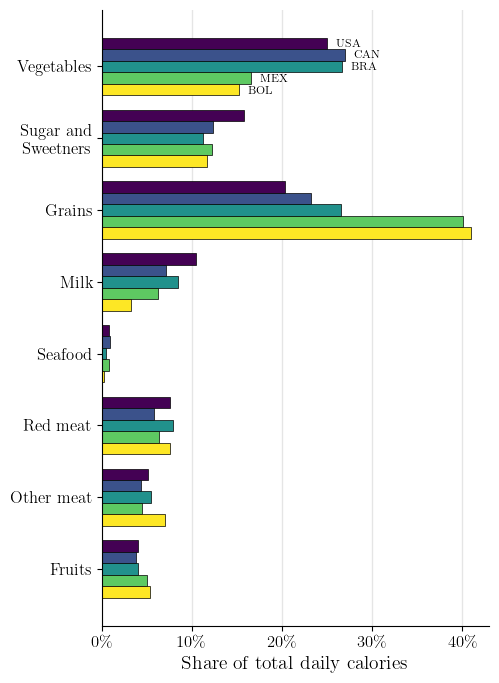

In [ ]:
remain_text = 'food_available_for_consumption__0664pc__kilocalories_per_day_per_capita'

categories = {
    'Vegetables': ['vegetable_oils__00002914','vegetables__00002918','starchy_roots__00002907','pulses__00002911'],
    'Sugar and\nSweetners': ['sugar__and__sweeteners__00002909'],
    'Grains': ['wheat__00002511','maize__00002514','rice__00002807','barley__00002513'],
    'Milk': ['milk__00002948'],
    'Seafood': ['fish_and_seafood__00002960'],
    'Red meat': ['meat__beef_and_buffalo__00002731','meat__pig__00002733','meat__sheep_and_goat__00002732'],
    'Other meat': ['meat__poultry__00002734'],
    'Fruits': ['fruit__00002919']}

colors = ['#440154','#3b528b','#21918c','#5ec962','#fde725']

fig, ax = plt.subplots(figsize=(5,8))
ax.set_axisbelow(True)
ax.grid(True, axis='x', lw = 1, color = 'grey', alpha = 0.2)
for i, country in enumerate(['USA','CAN','BRA','MEX','BOL']):
    cntry = br = df.loc[df['Code'] == country].reset_index(drop = True)
    print(f"Total daily Kcal per capita consumption: {country} - {cntry[cntry.columns[3:]].T.sum()[0]:.2f}")
    for j, key in enumerate(categories.keys()):
        value = 0
        for category in categories[key]:
            value += cntry[f'{category}__{remain_text}'].values[0] / cntry[cntry.columns[3:]].T.sum()
        
        plt.barh(-5*j - 0.8*i, value, color = colors[i], edgecolor = 'black', lw = 0.5)

        if j == 0:
            plt.text(value + 0.01, -0.83*i, country, va = 'center', fontsize = 8)

plt.yticks([-5*i - 1.6 for i in range(len(categories.keys()))],
           labels=[cat for cat in categories.keys()],
           fontsize = 12)
plt.xticks([0.1*i for i in range(5)], labels = [f"{10*i}\%" for i in range(5)],
           fontsize = 12)
plt.xlabel("Share of total daily calories", fontsize = 14)
ax.spines[['top','right']].set_visible(False)

if os.exists('./Plots'):
    os.makedirs('Plots')
    
plt.savefig('./Plots/Diet_kilocalories_distrib.svg', dpi = 300, bbox_inches = 'tight')
plt.show()

Total daily Kcal per capita consumption: USA - 3800.40
Total daily Kcal per capita consumption: BRA - 3330.72
Total daily Kcal per capita consumption: MEX - 3259.50
Total daily Kcal per capita consumption: JPN - 2623.24


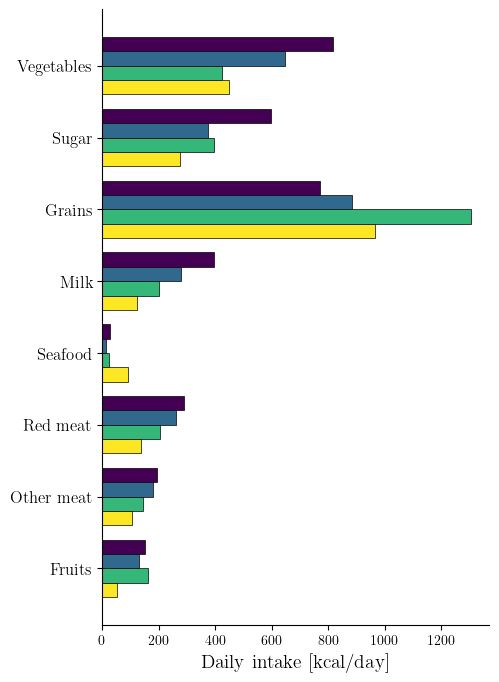

In [90]:
remain_text = 'food_available_for_consumption__0664pc__kilocalories_per_day_per_capita'

categories = {
    'Vegetables': ['vegetable_oils__00002914','vegetables__00002918'],
    'Sugar': ['sugar__and__sweeteners__00002909'],
    'Grains': ['wheat__00002511','maize__00002514','rice__00002807'],
    'Milk': ['milk__00002948'],
    'Seafood': ['fish_and_seafood__00002960'],
    'Red meat': ['meat__beef_and_buffalo__00002731','meat__pig__00002733','meat__sheep_and_goat__00002732'],
    'Other meat': ['meat__poultry__00002734'],
    'Fruits': ['fruit__00002919']}

colors = ['#440154','#31688e','#35b779','#fde725']

fig, ax = plt.subplots(figsize=(5,8))
for i, country in enumerate(['USA','BRA','MEX','JPN']):
    cntry = br = df.loc[df['Code'] == country].reset_index(drop = True)
    print(f"Total daily Kcal per capita consumption: {country} - {cntry[cntry.columns[3:]].T.sum()[0]:.2f}")
    for j, key in enumerate(categories.keys()):
        value = 0
        for category in categories[key]:
            value += cntry[f'{category}__{remain_text}'].values[0]
        
        plt.barh(-4*j - 0.8*i, value, color = colors[i], edgecolor = 'black', lw = 0.5)

plt.yticks([-4*i - 1.2 for i in range(len(categories.keys()))],
           labels=[cat for cat in categories.keys()],
           fontsize = 12)
# plt.xticks([0.1*i for i in range(5)], labels = [f"{10*i}\%" for i in range(5)],
#            fontsize = 12)
plt.xlabel("Daily intake [kcal/day]", fontsize = 14)
ax.spines[['top','right']].set_visible(False)
plt.show()